In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flights=pd.read_csv('flights.csv',low_memory=False)
flights=flights.sample(n=100000)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4529632,2015,10,9,5,VX,358,N851VA,14771,10721,2300,...,746.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2538549,2015,6,10,3,WN,1343,N211WN,MDW,CLE,735,...,930.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3360593,2015,7,29,3,DL,1322,N320US,PHL,DTW,730,...,852.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3656536,2015,8,15,6,AA,1273,N3BLAA,SJU,DFW,1610,...,2000.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4831424,2015,10,29,4,AA,2507,N3JAAA,13930,12953,855,...,1213.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flights.shape

(100000, 31)

In [4]:
flights.isnull().values.any()

True

In [5]:
#Checking how many null values are there in each columns
flights.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              242
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1496
DEPARTURE_DELAY         1496
TAXI_OUT                1544
WHEELS_OFF              1544
SCHEDULED_TIME             0
ELAPSED_TIME            1779
AIR_TIME                1779
DISTANCE                   0
WHEELS_ON               1590
TAXI_IN                 1590
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1590
ARRIVAL_DELAY           1779
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    98442
AIR_SYSTEM_DELAY       81673
SECURITY_DELAY         81673
AIRLINE_DELAY          81673
LATE_AIRCRAFT_DELAY    81673
WEATHER_DELAY          81673
dtype: int64

<Axes: xlabel='CANCELLATION_REASON', ylabel='count'>

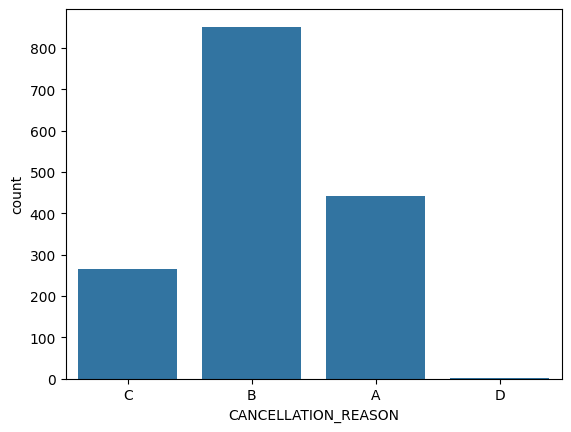

In [6]:
sns.countplot(x='CANCELLATION_REASON',data=flights)

Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security 

We can observe from graph easily that mostly weather is responsible for delays of flight.

<Axes: xlabel='MONTH', ylabel='count'>

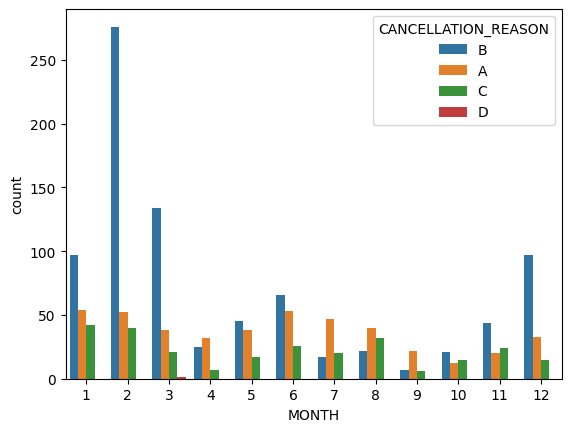

In [7]:
sns.countplot(x="MONTH",hue="CANCELLATION_REASON",data=flights)

C:\Users\HP\AppData\Local\Temp\ipykernel_25076\123585846.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")


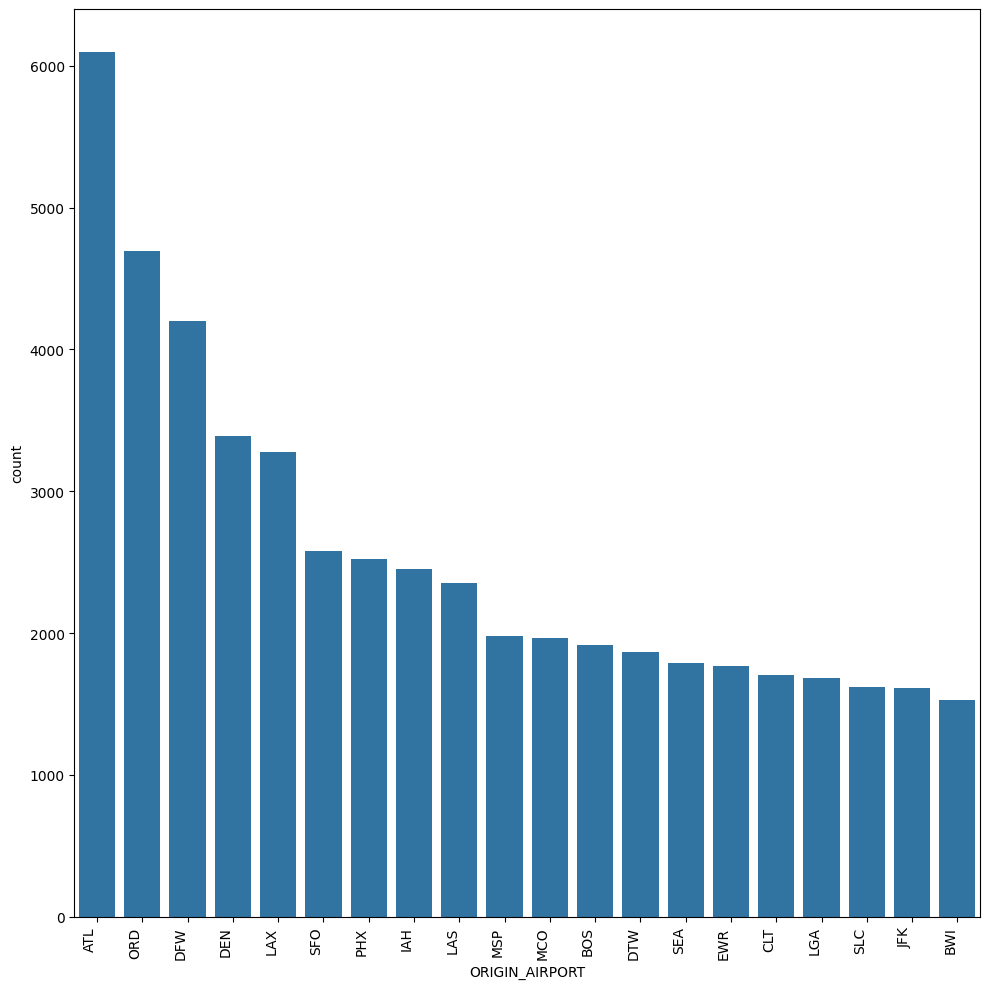

In [8]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights['ORIGIN_AIRPORT'], data =flights, order=flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

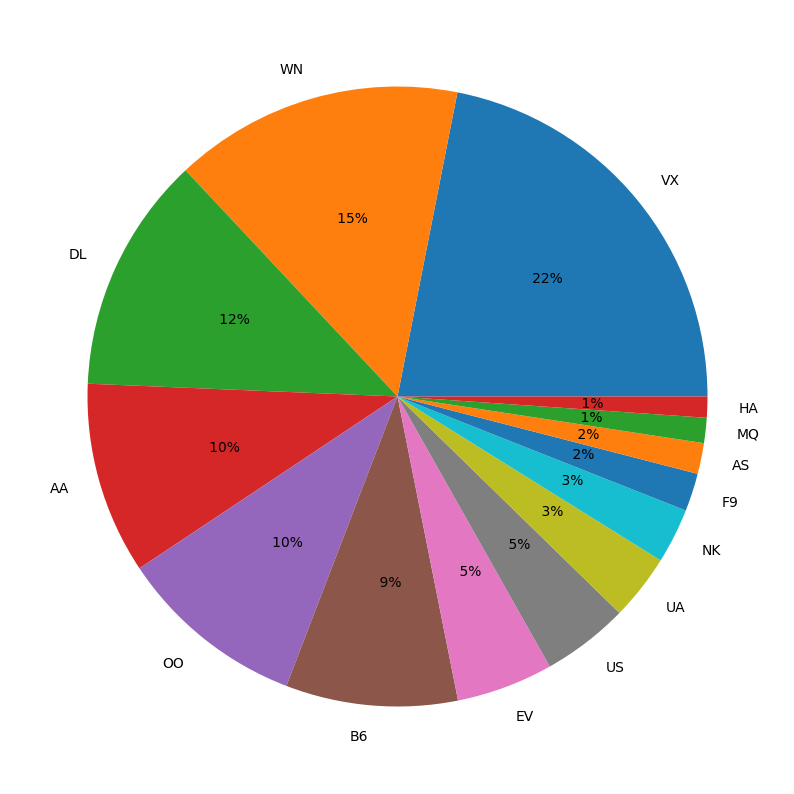

In [9]:
axis = plt.subplots(figsize=(10,14))
Name = flights["AIRLINE"].unique()
size = flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_25076\2085452572.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(flights.corr(),annot = True)


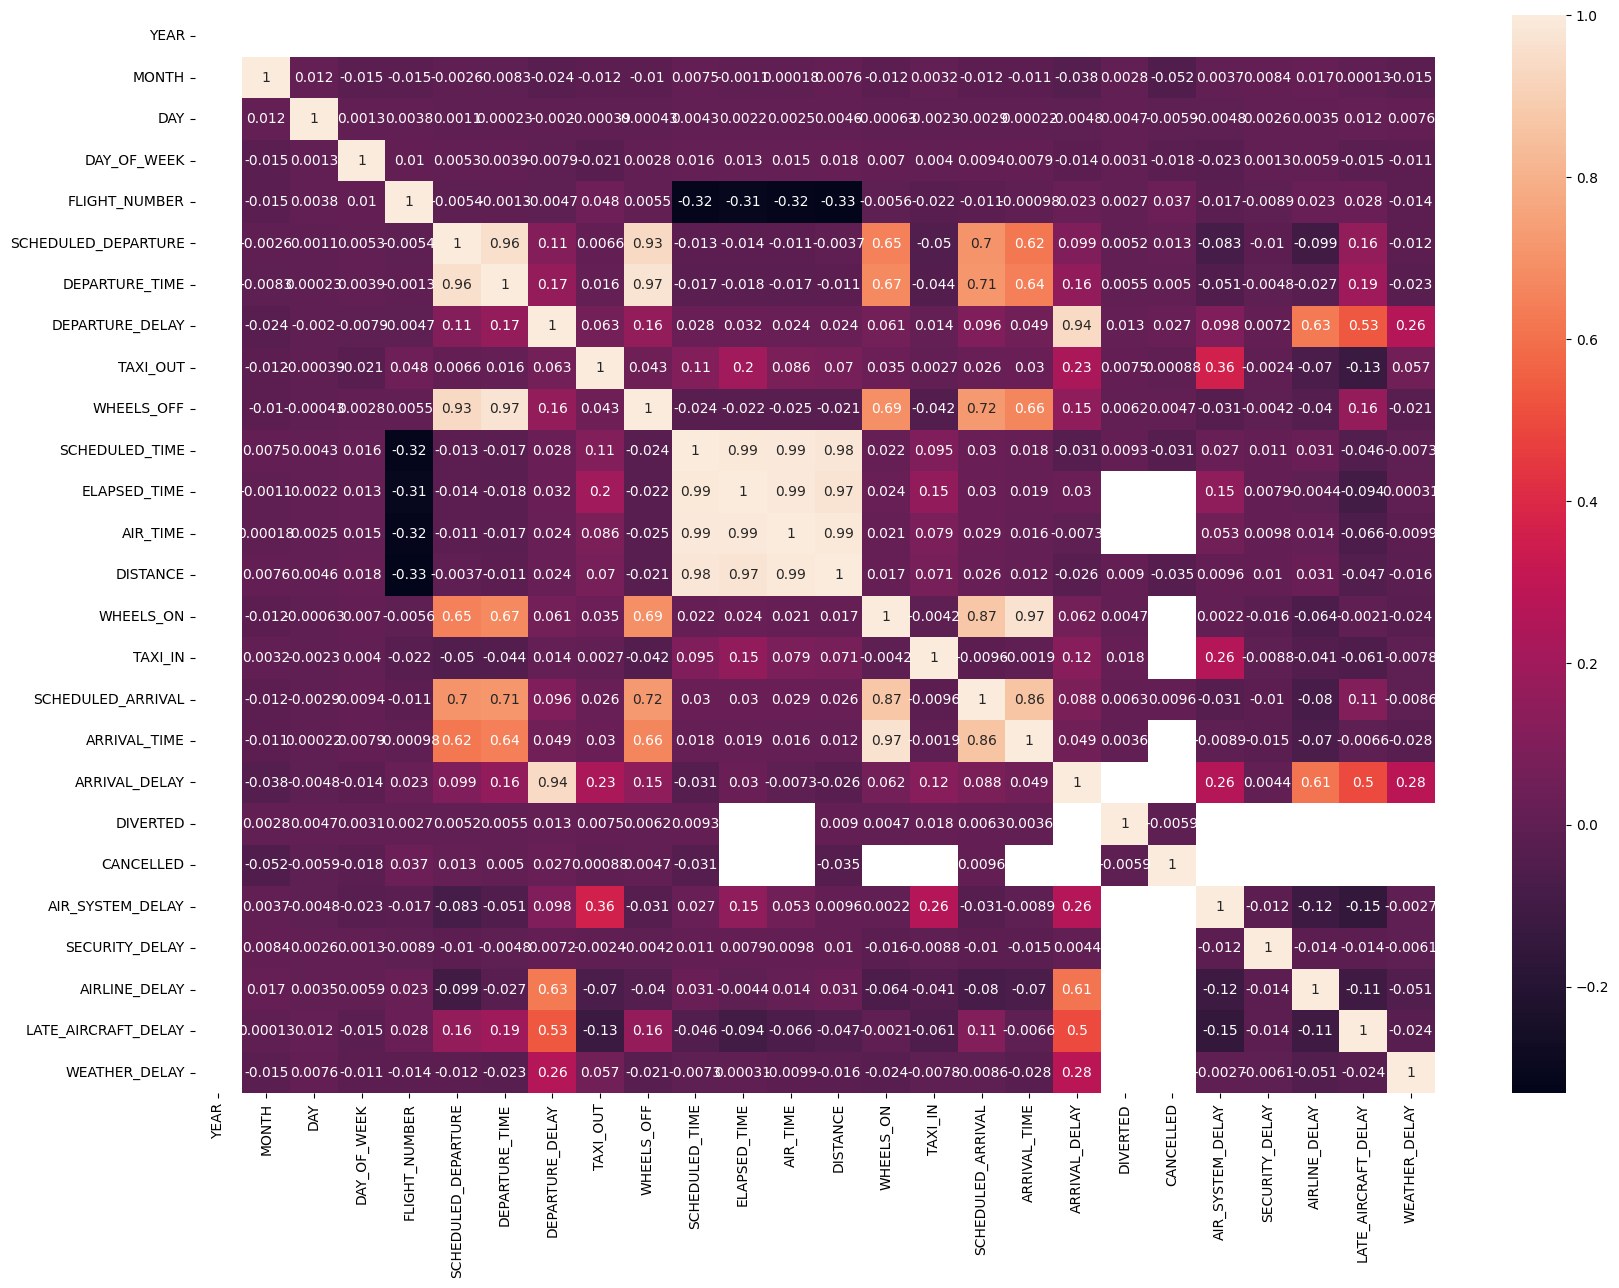

In [10]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(flights.corr(),annot = True)
plt.show()

Very High Correlation Between Arrival Delay and Departure Delay¶

It shows that maximum of the Arrival Delays are due to the Departure Delays.


In [11]:
corr=flights.corr()
corr

C:\Users\HP\AppData\Local\Temp\ipykernel_25076\3193331825.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=flights.corr()


,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.011808,-0.014822,-0.014681,-0.002562,-0.008340,-0.024361,-0.012360,-0.010274,...,-0.011586,-0.010615,-0.038296,0.002776,-0.051895,0.003738,0.008406,0.017412,0.000125,-0.014889
DAY,NaN,0.011808,1.000000,0.001338,0.003810,0.001056,0.000233,-0.002049,-0.000392,-0.000429,...,-0.002892,0.000221,-0.004810,0.004750,-0.005889,-0.004754,0.002593,0.003480,0.012191,0.007631
DAY_OF_WEEK,NaN,-0.014822,0.001338,1.000000,0.010353,0.005281,0.003862,-0.007893,-0.021337,0.002839,...,0.009406,0.007855,-0.013697,0.003134,-0.018433,-0.022509,0.001294,0.005860,-0.015358,-0.010578
FLIGHT_NUMBER,NaN,-0.014681,0.003810,0.010353,1.000000,-0.005379,-0.001314,-0.004705,0.047634,0.005505,...,-0.011088,-0.000982,0.022835,0.002699,0.037075,-0.017491,-0.008909,0.022594,0.028121,-0.014406
SCHEDULED_DEPARTURE,NaN,-0.002562,0.001056,0.005281,-0.005379,1.000000,0.960437,0.111002,0.006557,0.934683,...,0.703591,0.622345,0.099165,0.005165,0.013260,-0.083440,-0.010121,-0.099274,0.160288,-0.011565
DEPARTURE_TIME,NaN,-0.008340,0.000233,0.003862,-0.001314,0.960437,1.000000,0.167218,0.015804,0.971602,...,0.708775,0.644760,0.155503,0.005509,0.005008,-0.051345,-0.004827,-0.026997,0.189350,-0.023159
DEPARTURE_DELAY,NaN,-0.024361,-0.002049,-0.007893,-0.004705,0.111002,0.167218,1.000000,0.062825,0.158301,...,0.096405,0.048902,0.942687,0.013379,0.027026,0.097937,0.007178,0.625437,0.533261,0.257046
TAXI_OUT,NaN,-0.012360,-0.000392,-0.021337,0.047634,0.006557,0.015804,0.062825,1.000000,0.042567,...,0.026346,0.030306,0.233819,0.007519,0.000880,0.361861,-0.002355,-0.069826,-0.127465,0.056728
WHEELS_OFF,NaN,-0.010274,-0.000429,0.002839,0.005505,0.934683,0.971602,0.158301,0.042567,1.000000,...,0.721125,0.664642,0.151862,0.006193,0.004670,-0.031399,-0.004200,-0.039645,0.163375,-0.021189


In [12]:
variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
flights.drop(variables_to_remove,axis=1,inplace= True)
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [13]:
airport = pd.read_csv('airports.csv',low_memory=False)
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [14]:
flights.loc[~flights.ORIGIN_AIRPORT.isin(airport.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHER'
flights.loc[~flights.DESTINATION_AIRPORT.isin(airport.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHER'
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4529632,10,9,5,VX,OTHER,OTHER,2300,-1.0,2704,6.0
2538549,6,10,3,WN,MDW,CLE,735,-7.0,307,-10.0
3360593,7,29,3,DL,PHL,DTW,730,-4.0,453,-19.0
3656536,8,15,6,AA,SJU,DFW,1610,-1.0,2165,-14.0
4831424,10,29,4,AA,OTHER,OTHER,855,21.0,733,2.0
...,...,...,...,...,...,...,...,...,...,...
1704660,4,19,7,EV,IAD,CLE,1723,1.0,288,13.0
3201060,7,19,7,NK,OAK,DFW,1810,-4.0,1457,-13.0
1875813,4,30,4,MQ,ORD,TYS,905,-7.0,475,-21.0
1714940,4,20,1,F9,MCO,TTN,1045,42.0,896,28.0


In [15]:
print(flights.ORIGIN_AIRPORT.nunique())
print(flights.DESTINATION_AIRPORT.nunique())
print(flights.AIRLINE.nunique())

321
322
14


In [16]:
flights=flights.dropna()
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4529632,10,9,5,VX,OTHER,OTHER,2300,-1.0,2704,6.0
2538549,6,10,3,WN,MDW,CLE,735,-7.0,307,-10.0
3360593,7,29,3,DL,PHL,DTW,730,-4.0,453,-19.0
3656536,8,15,6,AA,SJU,DFW,1610,-1.0,2165,-14.0
4831424,10,29,4,AA,OTHER,OTHER,855,21.0,733,2.0
...,...,...,...,...,...,...,...,...,...,...
1704660,4,19,7,EV,IAD,CLE,1723,1.0,288,13.0
3201060,7,19,7,NK,OAK,DFW,1810,-4.0,1457,-13.0
1875813,4,30,4,MQ,ORD,TYS,905,-7.0,475,-21.0
1714940,4,20,1,F9,MCO,TTN,1045,42.0,896,28.0


In [17]:
flights.shape

(98221, 10)

In [18]:
df=pd.DataFrame(flights)
df['DAY_OF_WEEK']= df['DAY_OF_WEEK'].apply(str)
df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4529632,10,9,THURSDAY,VX,OTHER,OTHER,2300,-1.0,2704,6.0
2538549,6,10,TUESDAY,WN,MDW,CLE,735,-7.0,307,-10.0
3360593,7,29,TUESDAY,DL,PHL,DTW,730,-4.0,453,-19.0
3656536,8,15,FRIDAY,AA,SJU,DFW,1610,-1.0,2165,-14.0
4831424,10,29,WEDNESDAY,AA,OTHER,OTHER,855,21.0,733,2.0
...,...,...,...,...,...,...,...,...,...,...
1704660,4,19,SATURDAY,EV,IAD,CLE,1723,1.0,288,13.0
3201060,7,19,SATURDAY,NK,OAK,DFW,1810,-4.0,1457,-13.0
1875813,4,30,WEDNESDAY,MQ,ORD,TYS,905,-7.0,475,-21.0
1714940,4,20,SUNDAY,F9,MCO,TTN,1045,42.0,896,28.0


In [19]:
dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
df_cat=pd.get_dummies(df[dums],drop_first=True)
df_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4529632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2538549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3360593,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3656536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4831424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704660,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3201060,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1875813,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1714940,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
df_cat.columns

Index(['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       ...
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM',
       'DAY_OF_WEEK_MONDAY', 'DAY_OF_WEEK_SATURDAY', 'DAY_OF_WEEK_SUNDAY',
       'DAY_OF_WEEK_THURSDAY', 'DAY_OF_WEEK_TUESDAY', 'DAY_OF_WEEK_WEDNESDAY'],
      dtype='object', length=660)

In [21]:
df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [22]:
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [23]:
var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
df.drop(var_to_remove,axis=1,inplace=True)
df

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4529632,10,9,2300,-1.0,2704,6.0
2538549,6,10,735,-7.0,307,-10.0
3360593,7,29,730,-4.0,453,-19.0
3656536,8,15,1610,-1.0,2165,-14.0
4831424,10,29,855,21.0,733,2.0
...,...,...,...,...,...,...
1704660,4,19,1723,1.0,288,13.0
3201060,7,19,1810,-4.0,1457,-13.0
1875813,4,30,905,-7.0,475,-21.0
1714940,4,20,1045,42.0,896,28.0


In [24]:
data=pd.concat([df,df_cat],axis=1)
data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4529632,10,9,2300,-1.0,2704,6.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2538549,6,10,735,-7.0,307,-10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3360593,7,29,730,-4.0,453,-19.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3656536,8,15,1610,-1.0,2165,-14.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4831424,10,29,855,21.0,733,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704660,4,19,1723,1.0,288,13.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3201060,7,19,1810,-4.0,1457,-13.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1875813,4,30,905,-7.0,475,-21.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1714940,4,20,1045,42.0,896,28.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
data.shape

(98221, 666)

In [26]:
final_data = data.sample(n=60000)
final_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4205132,9,19,1215,-6.0,425,-11.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
521684,2,4,1245,12.0,2039,-14.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3539634,8,8,1639,20.0,68,9.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3848602,8,27,1228,4.0,409,-9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3815137,8,25,1213,-11.0,763,-15.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231979,3,21,1248,0.0,204,-10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4232414,9,21,1007,-11.0,551,-35.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1761556,4,23,740,-5.0,719,-5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3644011,8,14,1923,8.0,2248,-23.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
final_data.shape

(60000, 666)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [29]:
X=final_data.drop("DEPARTURE_DELAY",axis=1)
Y=final_data.DEPARTURE_DELAY

In [30]:
X

,MONTH,DAY,SCHEDULED_DEPARTURE,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4205132,9,19,1215,425,-11.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
521684,2,4,1245,2039,-14.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3539634,8,8,1639,68,9.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3848602,8,27,1228,409,-9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3815137,8,25,1213,763,-15.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231979,3,21,1248,204,-10.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4232414,9,21,1007,551,-35.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1761556,4,23,740,719,-5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3644011,8,14,1923,2248,-23.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
Y

4205132    -6.0
521684     12.0
3539634    20.0
3848602     4.0
3815137   -11.0
           ... 
1231979     0.0
4232414   -11.0
1761556    -5.0
3644011     8.0
1444331    -5.0
Name: DEPARTURE_DELAY, Length: 60000, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [33]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
y_pred = reg_rf.predict(X_test)

In [35]:
reg_rf.score(X_train,y_train)

0.9901619003635758

In [36]:
reg_rf.score(X_test,y_test)

0.9198063229106346

In [37]:
metrics.r2_score(y_test,y_pred)

0.9198063229106346

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 6.099714999999999
MSE: 105.24931353333332
RMSE: 10.259108807948833


In [39]:
pp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pp

,Actual,Predicted
1988027,-3.0,-3.63
4967374,55.0,56.55
1128275,19.0,7.69
2011081,-1.0,-1.41
1064393,-1.0,-3.67
...,...,...
4490172,-4.0,-1.81
951704,34.0,17.23
1213329,29.0,26.63
697681,1.0,-0.03


In [40]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [41]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [42]:
# Random search of parameters, using 5 fold cross validation,search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [43]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=182; total time=  14.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=182; total time=  18.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=182; total time=  15.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=182; total time=  15.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=182; total time=  15.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=  10.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=  12.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
rf_random.best_params_

{'n_estimators': 44,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [45]:
p=rf_random.predict(X_test)

In [46]:
metrics.r2_score(y_test,p)

0.656332037236693

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test,p))
print('MSE:', metrics.mean_squared_error(y_test,p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,p)))

MAE: 11.249035079796428
MSE: 451.0432552422996
RMSE: 21.2377789620831


In [48]:
zz=pd.DataFrame({'Actual':y_test,'Predicted':p})
zz

,Actual,Predicted
1988027,-3.0,-0.441732
4967374,55.0,21.174519
1128275,19.0,3.664399
2011081,-1.0,3.763969
1064393,-1.0,2.274114
...,...,...
4490172,-4.0,-0.629665
951704,34.0,6.929587
1213329,29.0,9.530087
697681,1.0,3.581316


In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=0)

In [50]:
GBR=gbr.fit(X_train,y_train)
pre=GBR.predict(X_test)

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE: 6.111070467101181
MSE: 100.92711165610224
RMSE: 10.046248635988572


In [52]:
metrics.r2_score(y_test,pre)

0.9230995820305427

In [53]:
gg=pd.DataFrame({'Actual':y_test,'Predicted':pre})
gg

,Actual,Predicted
1988027,-3.0,-6.791360
4967374,55.0,55.985808
1128275,19.0,6.197716
2011081,-1.0,-0.862855
1064393,-1.0,-1.869341
...,...,...
4490172,-4.0,-2.356771
951704,34.0,15.264822
1213329,29.0,22.420284
697681,1.0,1.724452


In [54]:
def predict(MONTH, DAY,SCHEDULED_DEPARTURE,DISTANCE, ARRIVAL_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_WEEK):
    AIRLINE_index = np.where(X.columns==AIRLINE)[0][0]
    ORIGIN_index = np.where(X.columns==ORIGIN_AIRPORT)[0][0]
    DESTINATION_index = np.where(X.columns==DESTINATION_AIRPORT)[0][0]
    DAY_OF_WEEK_index = np.where(X.columns==DAY_OF_WEEK)[0][0]
    x= np.zeros(len(X.columns))
    x[0] = MONTH
    x[1] = DAY
    x[2] = SCHEDULED_DEPARTURE
    x[3] = DISTANCE
    x[4] = ARRIVAL_DELAY
    if AIRLINE_index >=0:
        x[AIRLINE_index] = 1
    if ORIGIN_index >=0:
        x[ORIGIN_index] = 1
    if DESTINATION_index >=0:
        x[DESTINATION_index] = 1
    if  DAY_OF_WEEK_index >= 0:
        x[ DAY_OF_WEEK_index] = 1

    return gbr.predict([x])[0]

In [55]:
res= predict(5,6,1515,328,-8.0,'AIRLINE_OO','ORIGIN_AIRPORT_PHX','DESTINATION_AIRPORT_ABQ','DAY_OF_WEEK_TUESDAY')
res

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


-3.967538314552458

In [56]:
if(res<=-15):
  print("Flight is delayed")
else:
  print("Flight is not delayed")

Flight is not delayed
